In [2]:
iris = sklearn.datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# iris.data
# iris.target

In [6]:
from  sklearn import model_selection

X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data,iris.target, test_size=0.3, random_state=42)

In [7]:
len(X_train)

105

In [8]:
len(X_test)

45

In [9]:
import sklearn.linear_model as lm
model = lm.LinearRegression()

In [10]:
X_train = [[1],[2],[3]]
y_train = [2.3,3.99,5.4]

fit_model = model.fit(X_train, y_train)

In [11]:
X_test = [[3],[5]]
y_test = [6,10]

y_pred = fit_model.predict(X_test)
print(y_pred)

[5.44666667 8.54666667]


In [12]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

1.2091777777777777


In [13]:
import numpy as np
print('RMSE:',np.sqrt(mse))

RMSE: 1.0996261991139433


In [14]:
r2 = metrics.r2_score(y_test,y_pred)
print(r2)

0.6977055555555556


In [15]:
fit_model.score(X_test,y_test) # 회귀분석의 경우 이렇게 하면 R2 반환

0.6977055555555556

In [16]:
print('회귀계수:', fit_model.coef_)
print('회귀절편:', fit_model.intercept_)

회귀계수: [1.55]
회귀절편: 0.7966666666666677


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
 y_test

[6, 10]

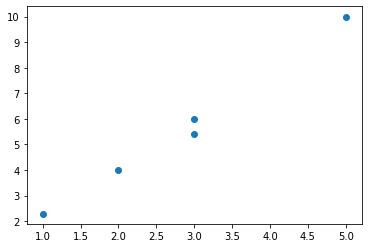

In [19]:
plt.scatter(X_train + X_test, y_train + y_test)
plt.show()

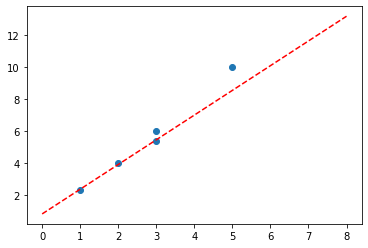

In [20]:
np.linspace(0,8) #균등한 선 만들어줌
xx = np.linspace(0,8)[:,np.newaxis] # 2차원으로 변경
yy = fit_model.predict(xx)


plt.plot(xx,yy,color='red',linestyle='--')
plt.scatter(X_train + X_test, y_train + y_test)
plt.show()

## statmodels 방법

In [21]:
import statsmodels.api as sm
print(X_train,y_train)

[[1], [2], [3]] [2.3, 3.99, 5.4]


In [22]:
X_train2 = sm.add_constant(X_train) # 절편계산을 위해 X_0=1 추가
print(X_train2)

[[1. 1.]
 [1. 2.]
 [1. 3.]]


In [23]:
model2 = sm.OLS(y_train,X_train2)
fit_model2 = model2.fit()

In [24]:
X_test2 = sm.add_constant(X_test) 
y_pred2 = fit_model2.predict(X_test2)
print(y_pred2)
print(fit_model2.summary())

[5.44666667 8.54666667]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     367.7
Date:                Wed, 15 Jul 2020   Prob (F-statistic):             0.0332
Time:                        10:57:30   Log-Likelihood:                 3.8976
No. Observations:                   3   AIC:                            -3.795
Df Residuals:                       1   BIC:                            -5.598
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7967      0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


## 연습

In [25]:
boston = sklearn.datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
boston.target[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [28]:
import pandas as pd
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
X = df[['RM']]
y = boston.target

In [30]:
# np.array(df['RM'])
# np.array(df[['RM']])

In [31]:
from  sklearn import model_selection

X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
from sklearn import linear_model

ex_fit_model = linear_model.LinearRegression().fit(X_train, y_train)

In [33]:
y_pred = ex_fit_model.predict(X_test)

In [34]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
print('MSE :',mse)

r2 = metrics.r2_score(y_test,y_pred) 
# ex_fit_model.score(X_test, y_test) 와 동일
print('R2 :',r2)

MSE : 36.517214730838624
R2 : 0.6015774471545623


In [35]:
print('coef :',ex_fit_model.coef_)
print('intercept :',ex_fit_model.intercept_)

coef : [8.46109164]
intercept : -30.571032410898336


In [36]:
X.describe()

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


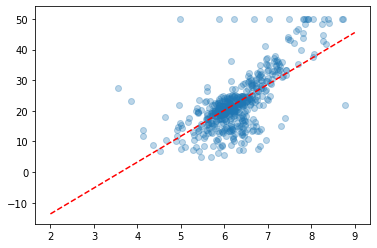

In [37]:
xx = np.linspace(2,9)[:,np.newaxis] # 2차원으로 변경
yy = ex_fit_model.predict(xx)

plt.plot(xx,yy,color='red',linestyle='--')
plt.scatter(X,y,alpha=0.3)
plt.show()